In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Version 7.000


In [2]:
N=50
K=1
xmin=-0.5
xmax=0.5
ymin=-0.5
ymax=0.5
dx = (xmax-xmin)/N
dy = (xmax-xmin)/N
dt = 0.25*np.min([dx,dy])**2
t0 = 0
tfinal=0.025

In [3]:
x = np.arange(xmin,xmax,dx)
y = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(x,y)
t = np.arange(t0,tfinal,dt)

In [4]:
f=2
#T0=0*(np.sin(np.pi*f*(X))**2)*(np.sin(np.pi*f*(Y))**2)+0.1*np.random.random((N,N))
T0=1*(np.sin(np.pi*f*(X))**2)*(np.sin(np.pi*f*(Y))**2)#+0.1*np.random.random((N,N))

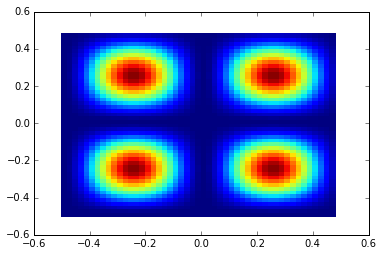

In [5]:
plt.pcolor(X,Y,T0,vmin=0,vmax=1)

In [6]:
def rhs(T):
    Ttemp = np.zeros((N+2,N+2))
    Ttemp[1:-1,1:-1]=T[:,:]
    Ttemp[0,1:-1]=T[-1,...]
    Ttemp[-1,1:-1]=T[0,...]
    Ttemp[1:-1,0]=T[...,-1]
    Ttemp[1:-1,-1]=T[...,0]
    out = np.zeros_like(T)
    out += (Ttemp[2:,1:-1]+Ttemp[:-2,1:-1]-2*Ttemp[1:-1,1:-1])/(dx**2)
    out += (Ttemp[1:-1,2:]+Ttemp[1:-1,:-2]-2*Ttemp[1:-1,1:-1])/(dy**2)
    out *= K
    return out

In [7]:
len(t)

250

In [8]:
T = np.empty((len(t),N,N))
T[0] = T0
for i in range(len(t)-1):
    K1 = T[i] + 0.5*dt*rhs(T[i])
    T[i+1] = T[i] + dt*rhs(K1)

In [21]:
def makefig(i):
    itrue=i/10
    plt.pcolor(X,Y,T[i],vmin=0,vmax=1)
    plt.axis('off')
    plt.savefig('forward_diffusion_{}.png'.format(itrue),bbox_inches='tight')

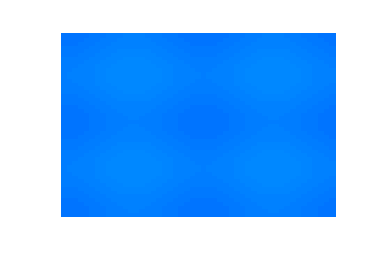

In [22]:
for i in range(0,250,10):
    makefig(i)